In [1]:
import multiprocessing
import gensim
from gensim.models import Word2Vec

In [2]:
data=gensim.models.word2vec.LineSentence('train.txt')
model=Word2Vec(data,size=300,window=5,min_count=5,workers=multiprocessing.cpu_count(), sg=1)

In [3]:
model.save('w2v_sg_100epocs')

In [4]:
model=Word2Vec.load('w2v_sg_100epocs')

In [5]:
model.wv.most_similar('king')

[('gyanendra', 0.7404574155807495),
 ('prince', 0.7352997064590454),
 ('fahd', 0.7331616878509521),
 ('crown', 0.7292354106903076),
 ('nasser', 0.726343035697937),
 ('sultan', 0.7238395810127258),
 ('luther', 0.7194149494171143),
 ('jr', 0.7142606973648071),
 ('abdullah', 0.7120513916015625),
 ('louis', 0.7095059752464294)]

In [6]:
model.wv.most_similar(positive=["king", "woman"], negative=["man"], topn=4)

[('suburb', 0.5591256618499756),
 ('fahd', 0.5569353103637695),
 ('elizabeth', 0.5517306923866272),
 ('prince', 0.5516377091407776)]

In [7]:
from gensim.models.fasttext import FastText
from gensim.scripts.word2vec2tensor import word2vec2tensor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [8]:
keywords = ['king', 'china']
similar_words = {search_term: [item[0] for item in model.wv.most_similar([search_term], topn = 5)]
                  for search_term in keywords}
print(similar_words)

{'king': ['gyanendra', 'prince', 'fahd', 'crown', 'nasser'], 'china': ['chinese', 'japan', 'taiwan', 'mainland', 'brics']}


In [9]:
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = model.wv[words]

In [10]:
tsne = TSNE(n_components = 2, random_state = 0, n_iter = 10000, perplexity = 2)
np.set_printoptions(suppress = True)
T = tsne.fit_transform(wvs)
labels = words

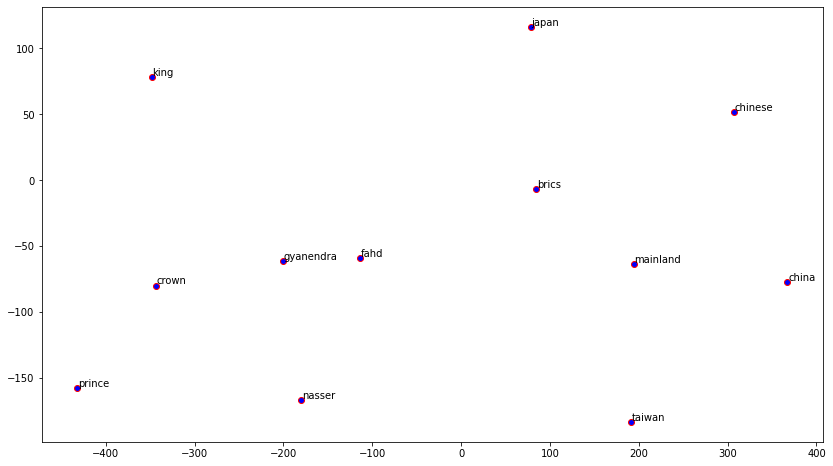

In [11]:
plt.figure(figsize = (14, 8))
plt.scatter(T[:, 0], T[:, 1], c = 'blue', edgecolors = 'r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
  plt.annotate(label, xy = (x + 1, y + 1), xytext = (0, 0), textcoords = 'offset points')
plt.savefig('t-SNE-skipgram_most-similar.png', dpi=150, bbox_inches='tight')
plt.show()

In [12]:
from __future__ import absolute_import, division, print_function
import numpy as np
count = 10000
word_vectors_matrix = np.ndarray(shape=(count, 300), dtype='float64')
word_list = []
i = 0
for word in model.wv.vocab:
    word_vectors_matrix[i] = model[word]
    word_list.append(word)
    i = i+1
    if i == count:
        break
print("word_vectors_matrix shape is ", word_vectors_matrix.shape)

word_vectors_matrix shape is  (10000, 300)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [13]:
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)

word_vectors_matrix_2d shape is  (10000, 2)


In [14]:
import pandas as pd
points = pd.DataFrame(
    [
        (word, coords[0], coords[1]) 
        for word, coords in [
            (word, word_vectors_matrix_2d[word_list.index(word)])
            for word in word_list
        ]
    ],
    columns=["word", "x", "y"]
)
print("Points DataFrame built")

Points DataFrame built


Text(0.5, 1.0, 'Visualizing word2vec with t-SNE in 2D')

<Figure size 432x288 with 0 Axes>

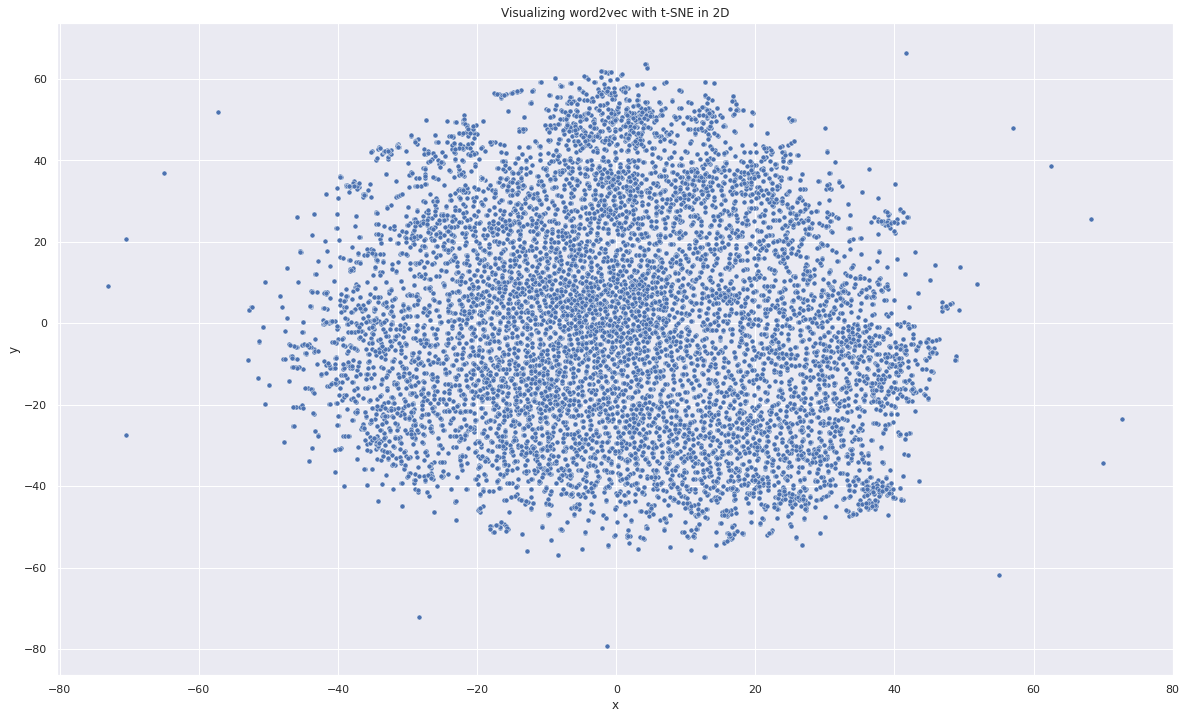

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#sns.set_context("poster")
sns.set()
plt.savefig('t-SNE-skipgram_complete-embedding.png', dpi=150, bbox_inches='tight')
plt.figure(figsize=(20, 12))
sns.scatterplot(x="x", y="y",s=25, data=points).set_title('Visualizing word2vec with t-SNE in 2D')
#points.sns.scatter("x", "y", s=10, figsize=(20, 12))

In [16]:
keys = ['king', 'china', 'human', 'money', 'war', 'nine', 'popular', 'political']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [17]:
from sklearn.decomposition import PCA
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
pca_model_en_2d = PCA(n_components=2)
embeddings_en_2d = np.array(pca_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

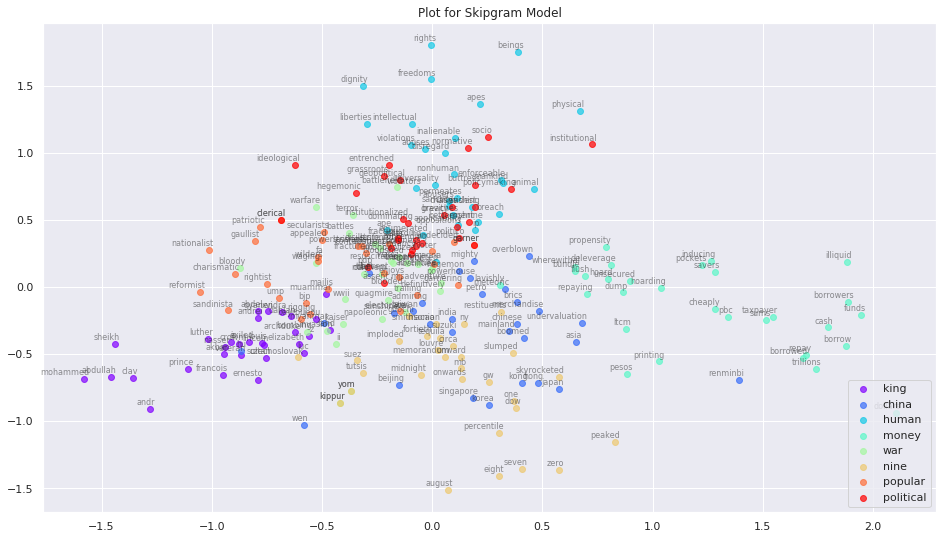

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def pca_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


pca_plot_similar_words('Plot for Skipgram Model', keys, embeddings_en_2d, word_clusters, 0.7,
                        'PCA-skipgram_most-similar.png')

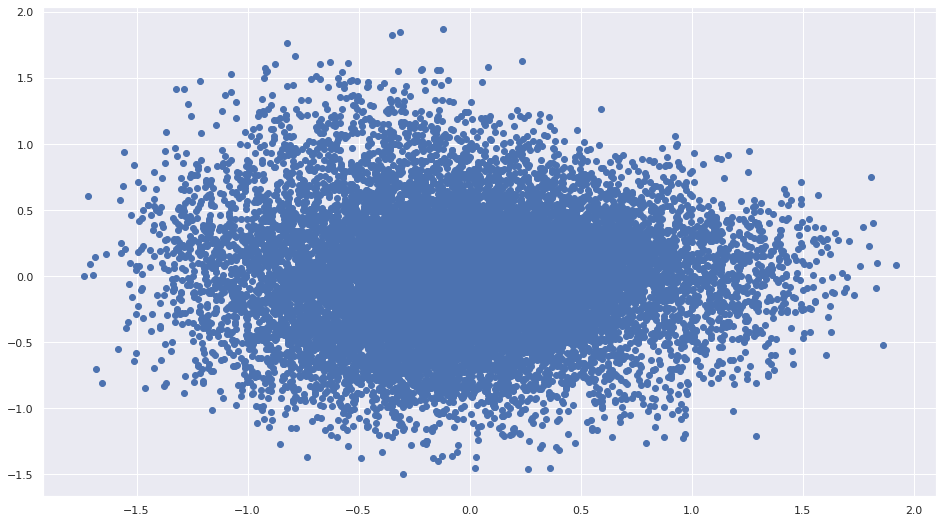

In [19]:
X = model.wv[model.wv.vocab]
plt.figure(figsize=(16,9))
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
plt.savefig("PCA-skipgram_complete-embedding.png", format='png', dpi=150, bbox_inches='tight')
plt.show()